In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
import warnings
warnings.filterwarnings('ignore')
 

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.shape

(284807, 31)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.165980e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.373150e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.086869e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.490107e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.177556e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406455e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
outlier_fraction=df.Class.value_counts()[1]/len(df)
outlier_fraction


0.001727485630620034

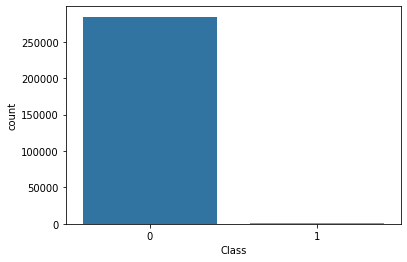

In [9]:
sns.countplot(df.Class)

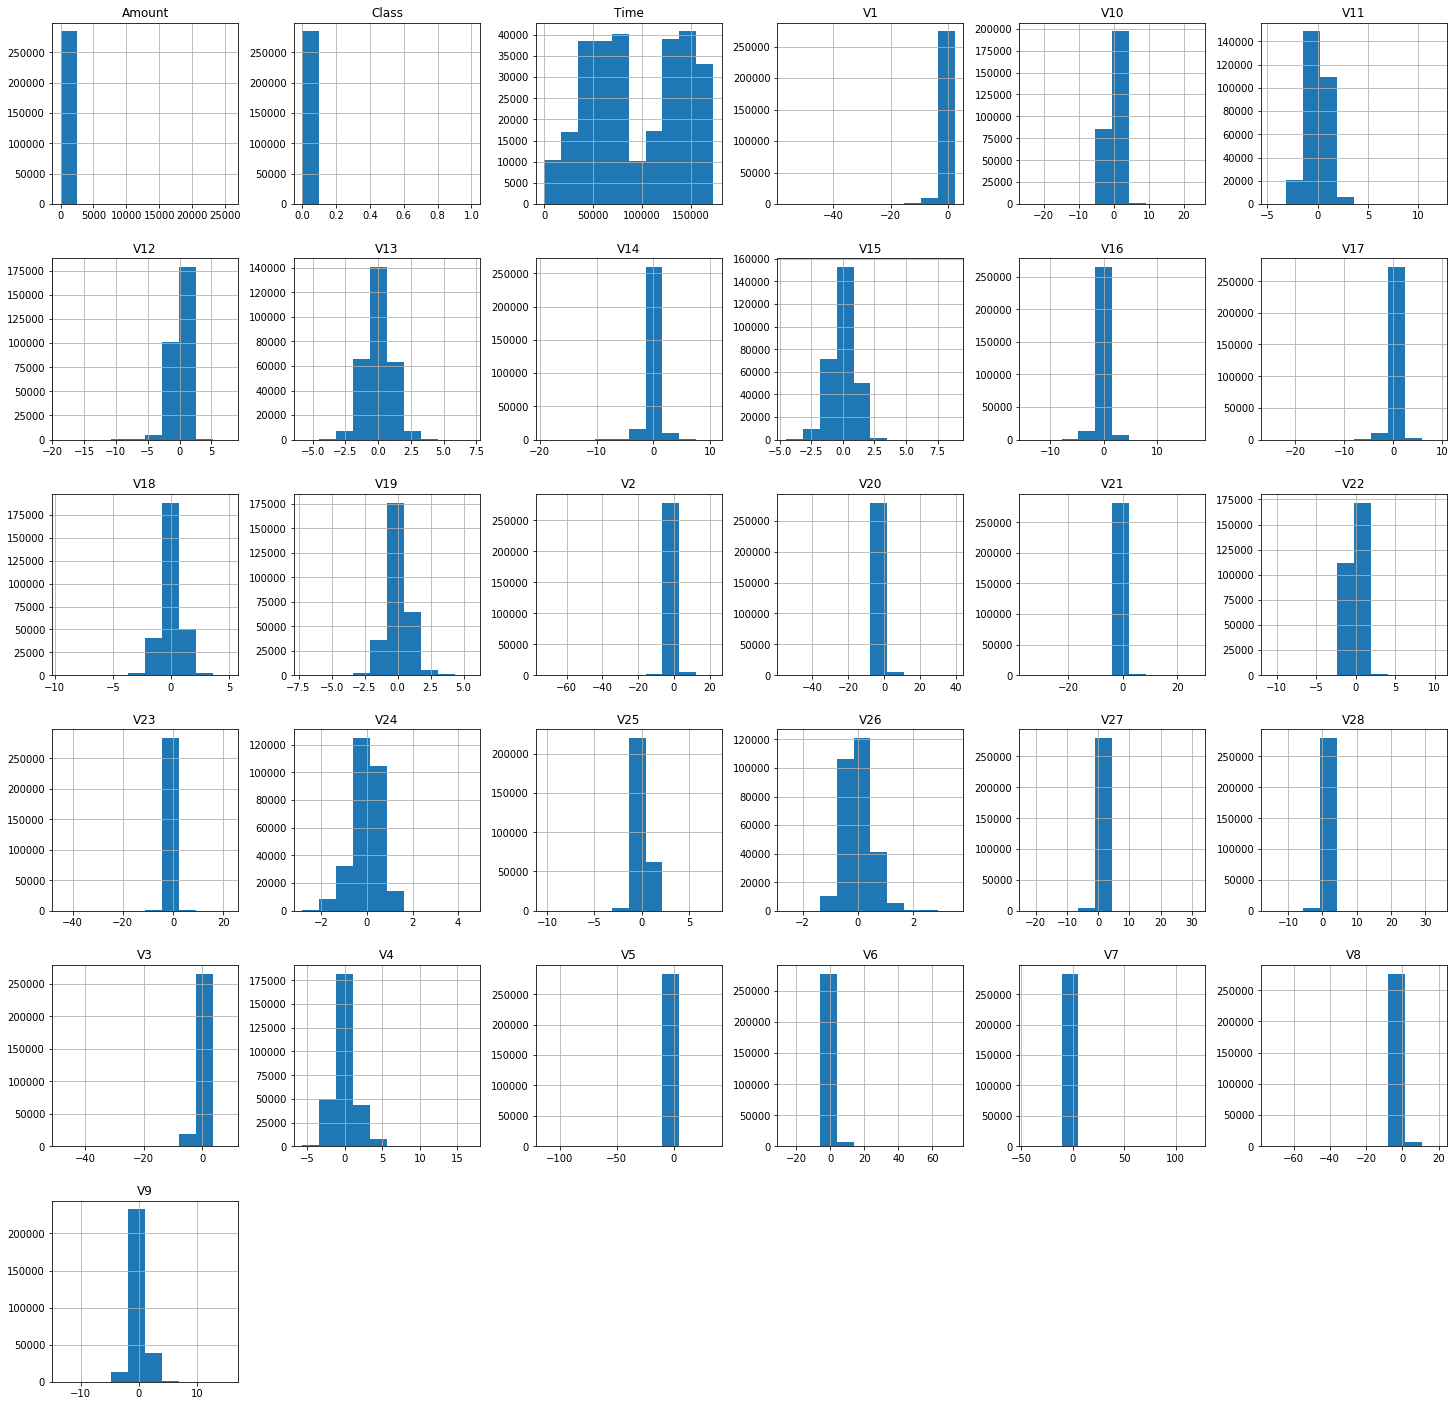

In [10]:
df.hist(figsize=(25,25))
plt.show()

In [12]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

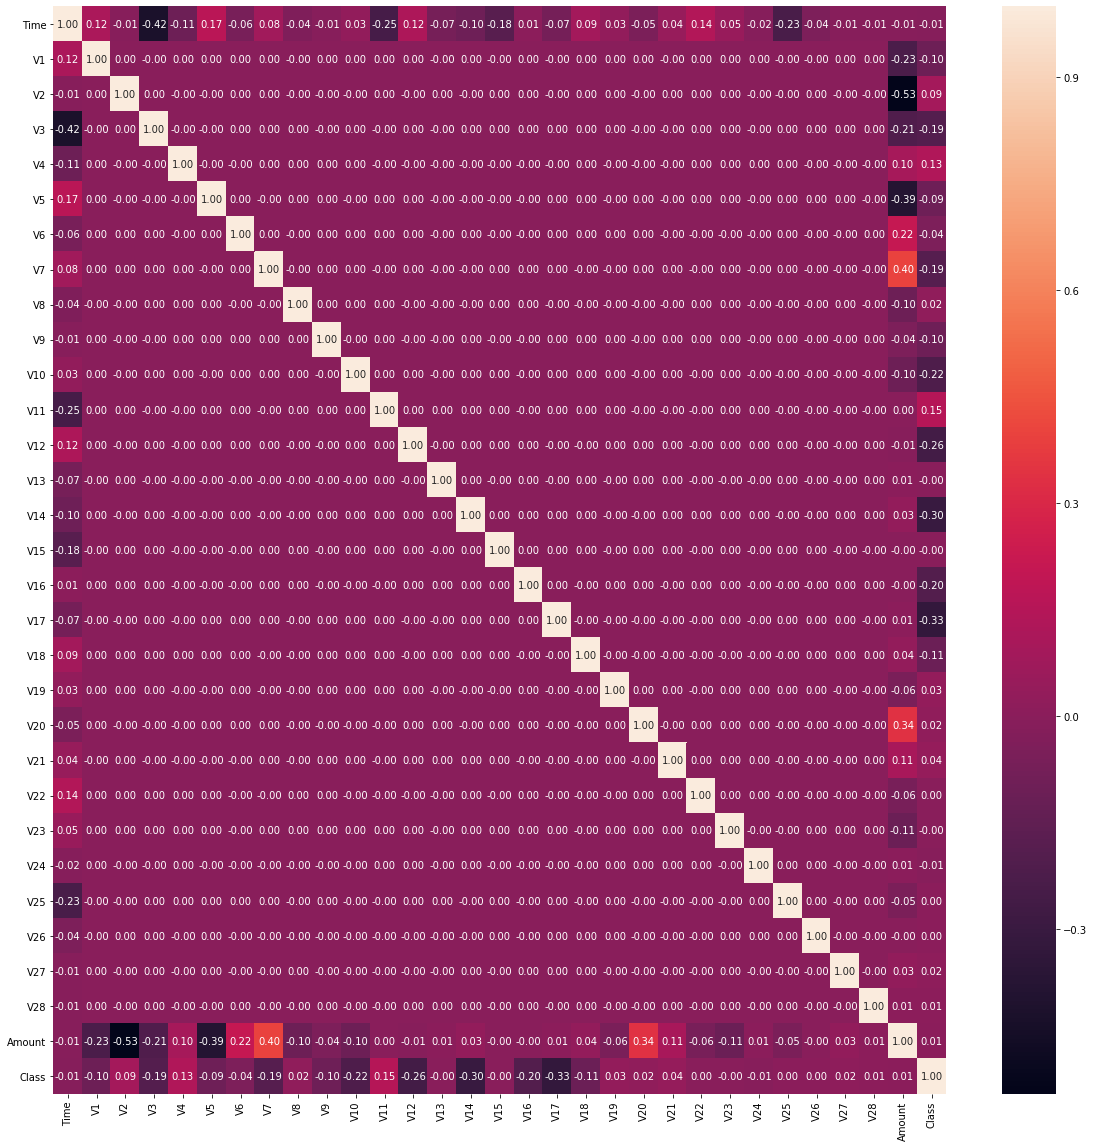

In [13]:
df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

In [11]:
x=df.drop('Class',axis=1)
y=df.Class

In [12]:
print(x.shape)
print(y.shape)

(284807, 30)
(284807,)


In [93]:
classifier={'IsolationForest': IsolationForest(max_samples=len(df),contamination=outlier_fraction,random_state=1),
            'LocalOutlierFactor': LocalOutlierFactor(n_neighbors=20,contamination=outlier_fraction ),
            'EllipticEnvelope' : EllipticEnvelope(contamination=outlier_fraction)
           }

In [103]:
isolationclf=IsolationForest(max_samples=len(df),contamination=outlier_fraction,random_state=1)
y_pred=isolationclf.fit_predict(x)
y_pred[y_pred ==1]=0
y_pred[y_pred==-1]=1

n_errors=(y_pred !=y).sum()
print('total_outliers :  {}'.format(df.Class.value_counts()[1]))
print('{} : {}'.format(isolationclf,n_errors))
print(accuracy_score(y,y_pred))
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))
        


        

total_outliers :  492
IsolationForest(behaviour='old', bootstrap=False,
                contamination=0.001727485630620034, max_features=1.0,
                max_samples=284807, n_estimators=100, n_jobs=None,
                random_state=1, verbose=0, warm_start=False) : 644
0.9977388196217087
[[283993    322]
 [   322    170]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.35      0.35      0.35       492

    accuracy                           1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807



In [112]:
elliptic_clf=EllipticEnvelope(contamination=.015,random_state=1)
y_pred=elliptic_clf.fit_predict(x)
y_pred[y_pred ==1]=0
y_pred[y_pred==-1]=1

n_errors=(y_pred !=y).sum()
print('total_outliers :  {}'.format(df.Class.value_counts()[1]))
print('{} : {}'.format(elliptic_clf,n_errors))
print(accuracy_score(y,y_pred))
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))
        


        

total_outliers :  492
EllipticEnvelope(assume_centered=False, contamination=0.015, random_state=1,
                 store_precision=True, support_fraction=None) : 4193
0.9852777494935167
[[280328   3987]
 [   206    286]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    284315
           1       0.07      0.58      0.12       492

    accuracy                           0.99    284807
   macro avg       0.53      0.78      0.56    284807
weighted avg       1.00      0.99      0.99    284807



In [117]:
Localoutlier_clf=LocalOutlierFactor(n_neighbors=3,contamination=outlier_fraction)
y_pred=Localoutlier_clf.fit_predict(x)
y_pred[y_pred ==1]=0
y_pred[y_pred==-1]=1

n_errors=(y_pred !=y).sum()
print('total_outliers :  {}'.format(df.Class.value_counts()[1]))
print('Localoutlier_clf: {}'.format(n_errors))
print(accuracy_score(y,y_pred))
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))
        


total_outliers :  492
Localoutlier_clf: 924
0.9967556977181038
[[283853    462]
 [   462     30]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.06      0.06      0.06       492

    accuracy                           1.00    284807
   macro avg       0.53      0.53      0.53    284807
weighted avg       1.00      1.00      1.00    284807



In [116]:
Localoutlier_clf

LocalOutlierFactor(algorithm='auto', contamination=0.001727485630620034,
                   leaf_size=30, metric='minkowski', metric_params=None,
                   n_jobs=None, n_neighbors=15, novelty=False, p=2)